In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import re

%matplotlib inline

In [2]:
# Clean text
def Tokenizer(str_input):
    from re import sub
    # from nltk.stem.porter import PorterStemmer
    from string import punctuation
    
    words = str_input.lstrip("{").rstrip("}").replace('"', "").lower().split(",")
    
    return " ".join(words)

In [3]:
listings = pd.read_csv('data/listings.csv', usecols = ['id', 'amenities'])

In [4]:
amen = " ".join(Tokenizer(entry) for entry in listings.amenities)

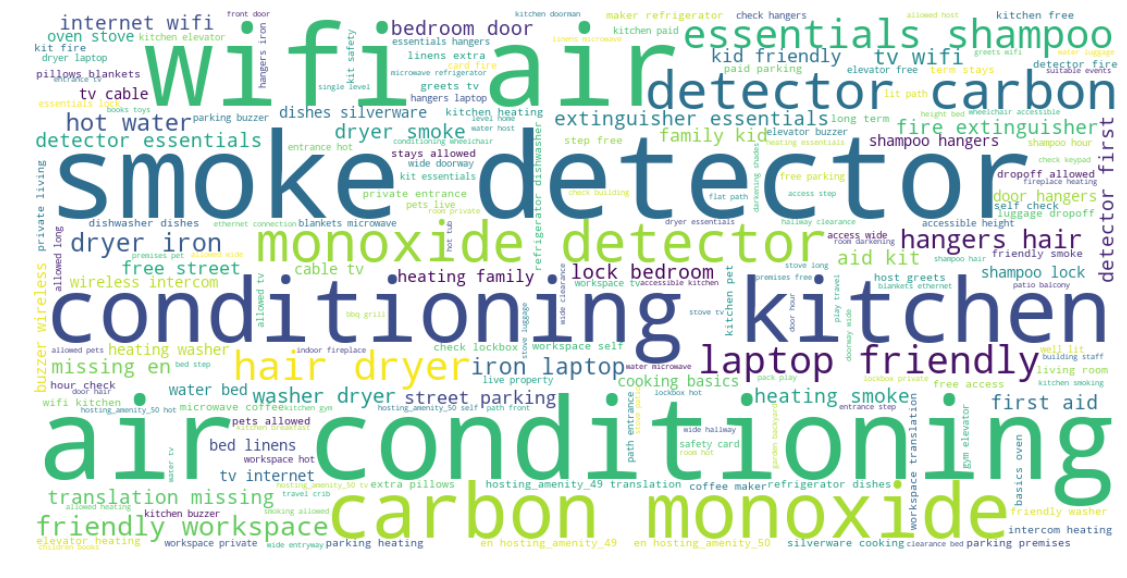

In [5]:
# Topic 0 wordcloud

wordcloud_wc = WordCloud(background_color="white", width=1000, height=500).generate(amen)
wordcloud_wc.to_file('img/wordcloud_wc.png')
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# Clean text
def Tokenizer2(str_input):
    from re import sub
    # from nltk.stem.porter import PorterStemmer
    from string import punctuation
    
    words = str_input.lstrip("{").rstrip("}").replace('"', "").lower().split(",")
    
    return words

In [7]:
amenities = listings.amenities.apply(Tokenizer2)

In [8]:
all_amen = set([ele for entry in amenities for ele in entry])

In [9]:
all_amen.remove("")

In [10]:
all_amen

{' toilet',
 '24-hour check-in',
 'accessible-height bed',
 'accessible-height toilet',
 'air conditioning',
 'air purifier',
 'baby bath',
 'baby monitor',
 'babysitter recommendations',
 'bathtub',
 'bathtub with bath chair',
 'bbq grill',
 'beach essentials',
 'beachfront',
 'bed linens',
 'breakfast',
 'building staff',
 'buzzer/wireless intercom',
 'cable tv',
 'carbon monoxide detector',
 'cat(s)',
 'ceiling hoist',
 'changing table',
 'children’s books and toys',
 'children’s dinnerware',
 'cleaning before checkout',
 'coffee maker',
 'cooking basics',
 'crib',
 'disabled parking spot',
 'dishes and silverware',
 'dishwasher',
 'dog(s)',
 'doorman',
 'dryer',
 'electric profiling bed',
 'elevator',
 'essentials',
 'ethernet connection',
 'ev charger',
 'extra pillows and blankets',
 'family/kid friendly',
 'fire extinguisher',
 'fireplace guards',
 'firm mattress',
 'first aid kit',
 'fixed grab bars for shower',
 'fixed grab bars for toilet',
 'flat path to front door',
 'free 

In [40]:
# 1 if entry has amenity else 0
# Make list of rows to make dataframe
all_rows = []
for row in amenities:
    output = []
    for a in list(all_amen):
        if a in row:
            output.append(1)
        else: 
            output.append(0)
    all_rows.append(output)

In [41]:
amenity_df = pd.DataFrame(np.array(all_rows), columns = list(all_amen))

In [42]:
amenity_df.sum()

disabled parking spot                           106
window guards                                  1217
private bathroom                                 19
flat path to front door                        1452
pool                                            822
essentials                                    45783
keypad                                         2385
cable tv                                      12372
bathtub with bath chair                          87
pets live on this property                     3348
hot tub                                        1815
baby monitor                                    132
smoking allowed                                2445
dishwasher                                     6031
pocket wifi                                     604
buzzer/wireless intercom                      11814
dishes and silverware                         12900
hair dryer                                    32354
electric profiling bed                           24
patio or bal

In [47]:
amenity_df.apply(lambda x: sum(x)/len(x), axis = 0).sort_values(ascending=False)

wifi                          0.975597
heating                       0.935274
kitchen                       0.923675
essentials                    0.920298
smoke detector                0.856457
air conditioning              0.844717
hangers                       0.728090
tv                            0.674741
carbon monoxide detector      0.674660
shampoo                       0.666178
hair dryer                    0.650358
laptop friendly workspace     0.624568
iron                          0.608648
hot water                     0.482934
washer                        0.415615
dryer                         0.409182
fire extinguisher             0.372477
lock on bedroom door          0.360698
internet                      0.331451
first aid kit                 0.326305
family/kid friendly           0.308696
free street parking           0.299811
refrigerator                  0.284574
elevator                      0.284052
bed linens                    0.260593
dishes and silverware    